In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
df_tp = pd.read_csv("../data/all.csv")
df_tp.drop_duplicates(inplace=True)
df_tp

,plate,lat,lon
0,am,30.754,132.824
1,am,30.970,132.965
2,am,31.216,133.197
3,am,31.515,133.500
4,am,31.882,134.042
...,...,...,...
12314,yz,20.561,112.784
12315,yz,20.137,113.030
12316,yz,19.713,113.274
12317,yz,19.288,113.517


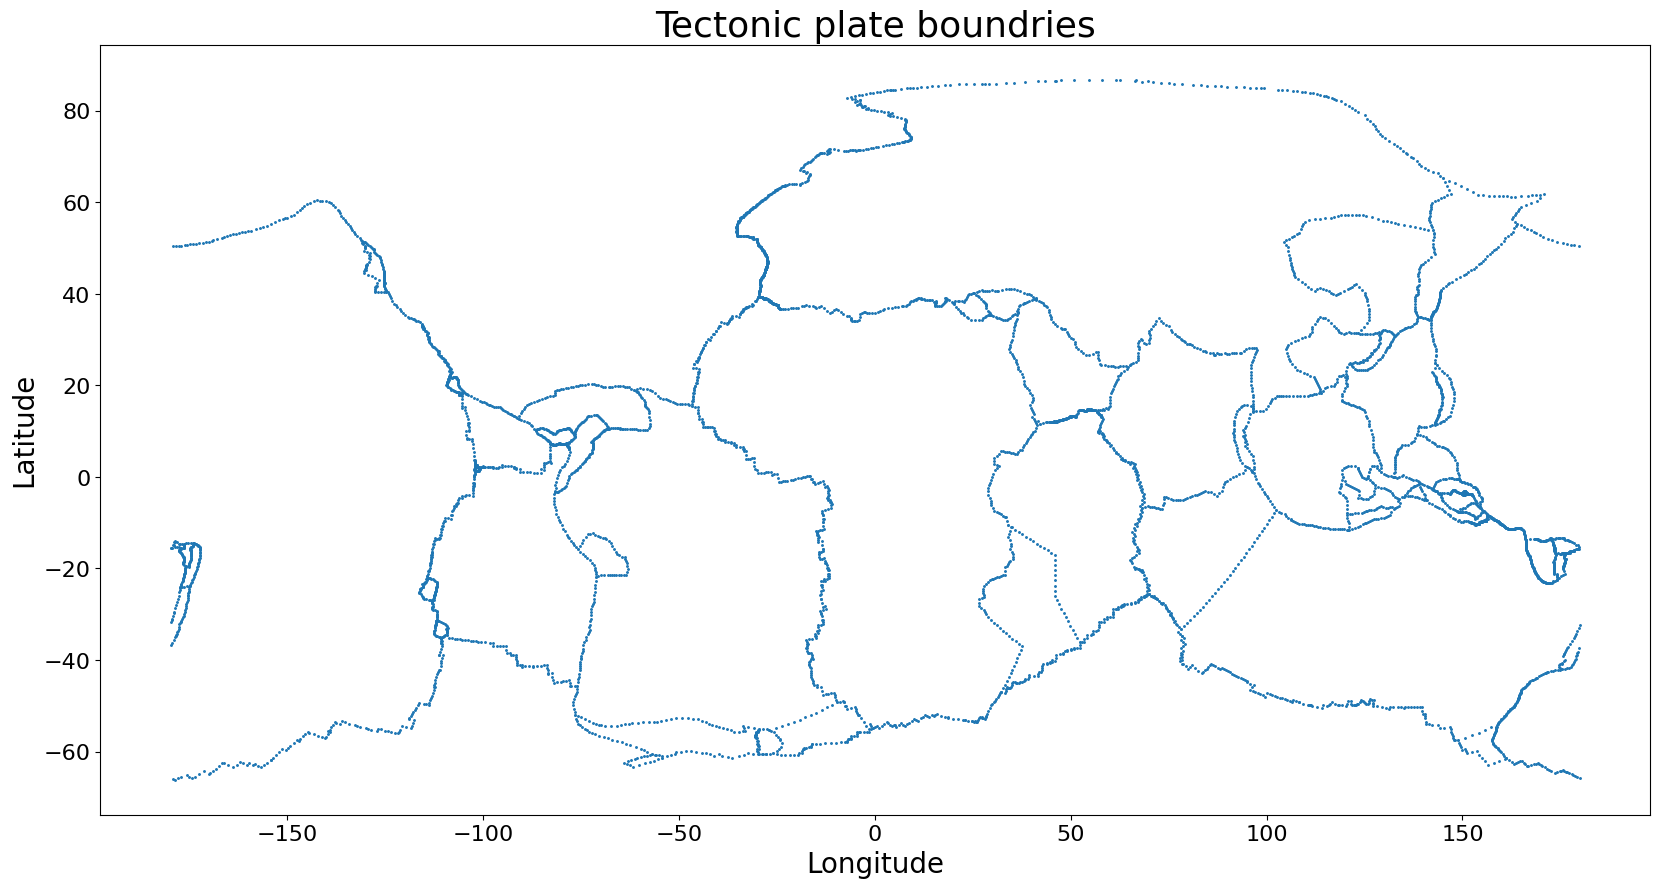

In [3]:
plt.figure(figsize=(20, 10))
plt.scatter(df_tp["lon"], df_tp["lat"], s=0.7)
plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
plt.title("Tectonic plate boundries", fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [4]:
df_tp[["lat", "lon"]].value_counts()

lat      lon     
-55.232  -26.995     3
-10.455   34.081     3
-3.245   -81.599     3
 39.400  -29.770     3
-15.736  -75.916     3
                    ..
-13.643   176.021    2
-13.649   167.157    2
-13.651   169.234    2
-13.672   176.256    2
 86.805   61.506     2
Name: count, Length: 5849, dtype: int64

In [5]:
df_tp[(df_tp["lat"] >= 40) & (df_tp["lat"] <= 60) & (df_tp["lon"] >= -40) & (df_tp["lon"] <= -20)][["lat", "lon"]].value_counts()

lat     lon    
40.033  -29.613    2
52.708  -34.925    2
52.465  -31.582    2
52.504  -31.866    2
52.516  -32.053    2
                  ..
46.638  -27.446    2
46.691  -27.444    2
46.755  -27.436    2
46.757  -27.378    2
59.969  -29.508    2
Name: count, Length: 269, dtype: int64

In [6]:
df_tp[(df_tp["lat"] >= 5) & (df_tp["lat"] <= 25) & (df_tp["lon"] >= -58) & (df_tp["lon"] <= -38)][["lat", "lon"]].value_counts()

lat     lon    
15.451  -46.766    3
7.703   -38.206    2
16.956  -53.460    2
18.422  -46.391    2
18.258  -56.118    2
                  ..
12.626  -44.262    2
12.427  -57.468    2
12.101  -44.278    2
12.085  -43.885    2
24.597  -46.196    2
Name: count, Length: 83, dtype: int64

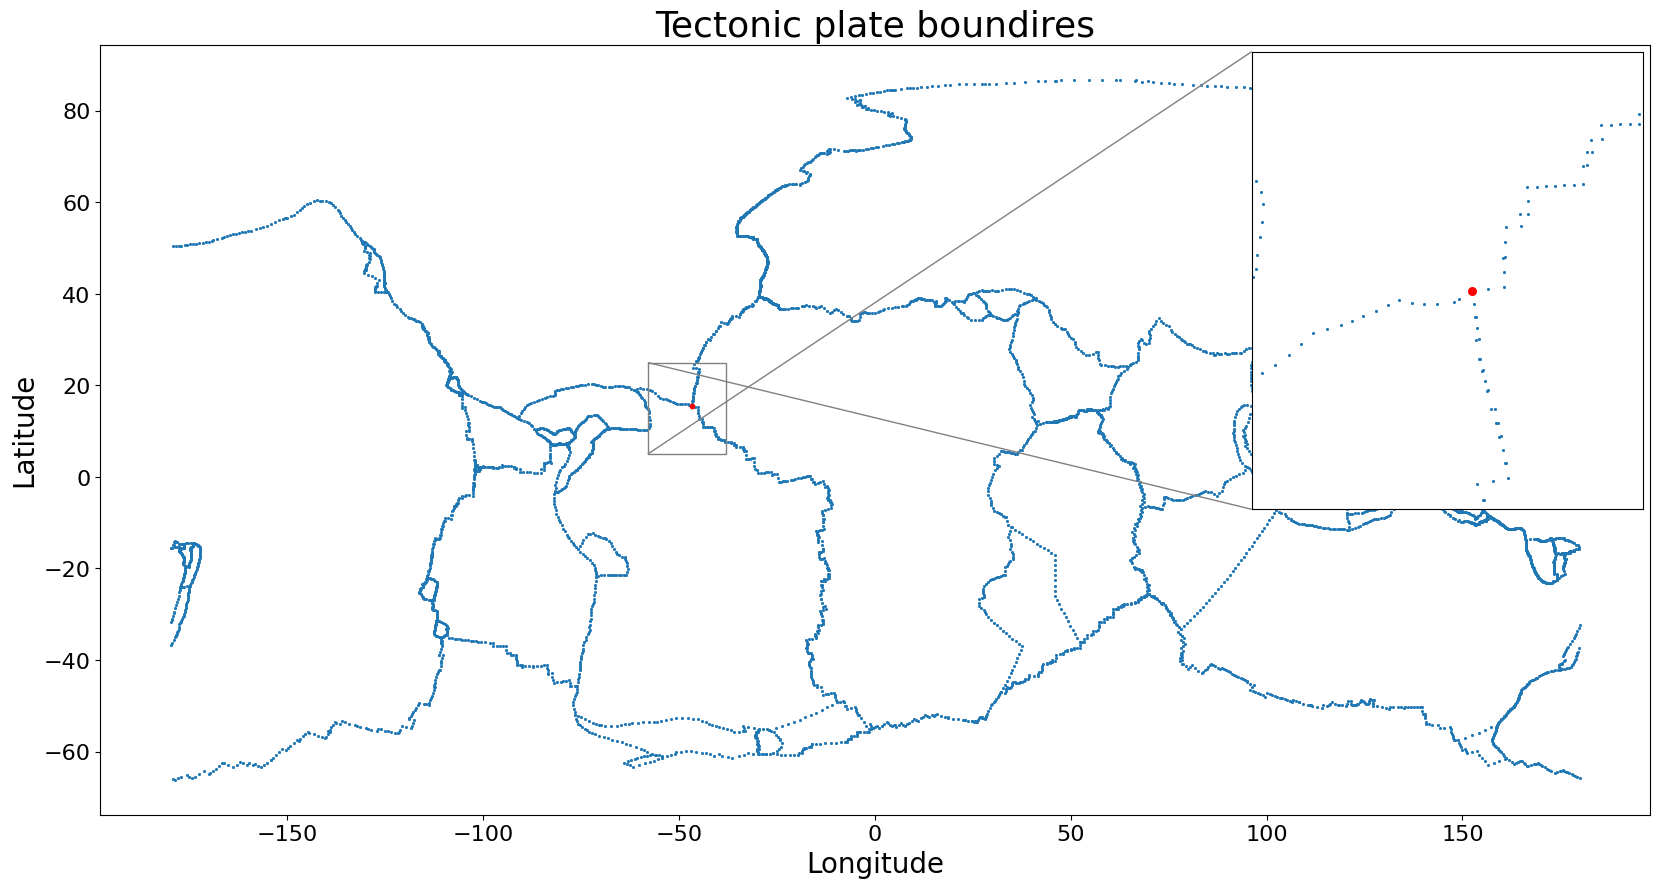

In [7]:
fig, ax = plt.subplots(figsize=[20,10])
ax.scatter(df_tp["lon"], df_tp["lat"],s=1)

axins = zoomed_inset_axes(ax, 5, loc=1) # zoom = 6
axins.scatter(df_tp["lon"], df_tp["lat"],s=1)

axins.set_xlim(-58, -38)
axins.set_ylim(25, 5)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(left = False, bottom = False) 

mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

ax.set_xlabel("Longitude", fontsize=20)
ax.set_ylabel("Latitude", fontsize=20)
ax.set_title("Tectonic plate boundires", fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

# color this point 15.451  -46.766 
axins.scatter(-46.766, 15.451, s=30, c="r")
ax.scatter(-46.766, 15.451, s=10, c="r")

plt.draw()
plt.show()

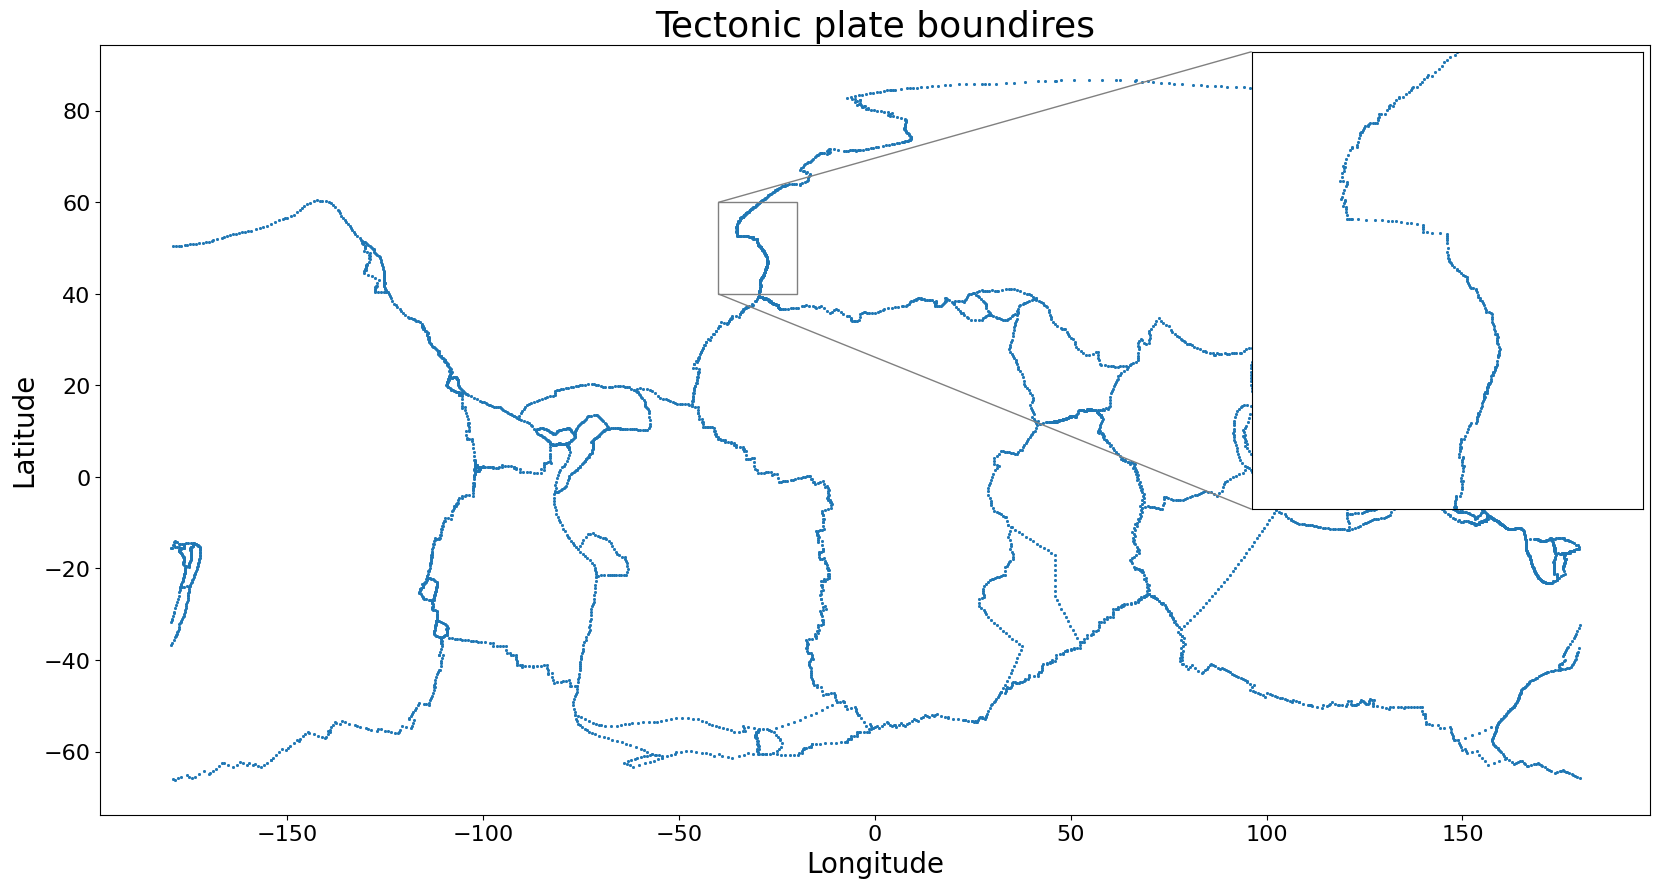

In [8]:
fig, ax = plt.subplots(figsize=[20,10])
ax.scatter(df_tp["lon"], df_tp["lat"],s=1)

axins = zoomed_inset_axes(ax, 5, loc=1) # zoom = 6
axins.scatter(df_tp["lon"], df_tp["lat"],s=1)

axins.set_xlim(-40, -20)
axins.set_ylim(40, 60)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(left = False, bottom = False) 

mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

ax.set_xlabel("Longitude", fontsize=20)
ax.set_ylabel("Latitude", fontsize=20)
ax.set_title("Tectonic plate boundires", fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

plt.draw()
plt.show()

In [2]:
df = pd.read_csv("../data/with_features.csv")
regions = np.load("../data/regions.npy", allow_pickle=True)

In [3]:
SPLIT_DATE_TRAIN = "2020-01-01"

In [4]:
df = df[df["time"] < SPLIT_DATE_TRAIN]

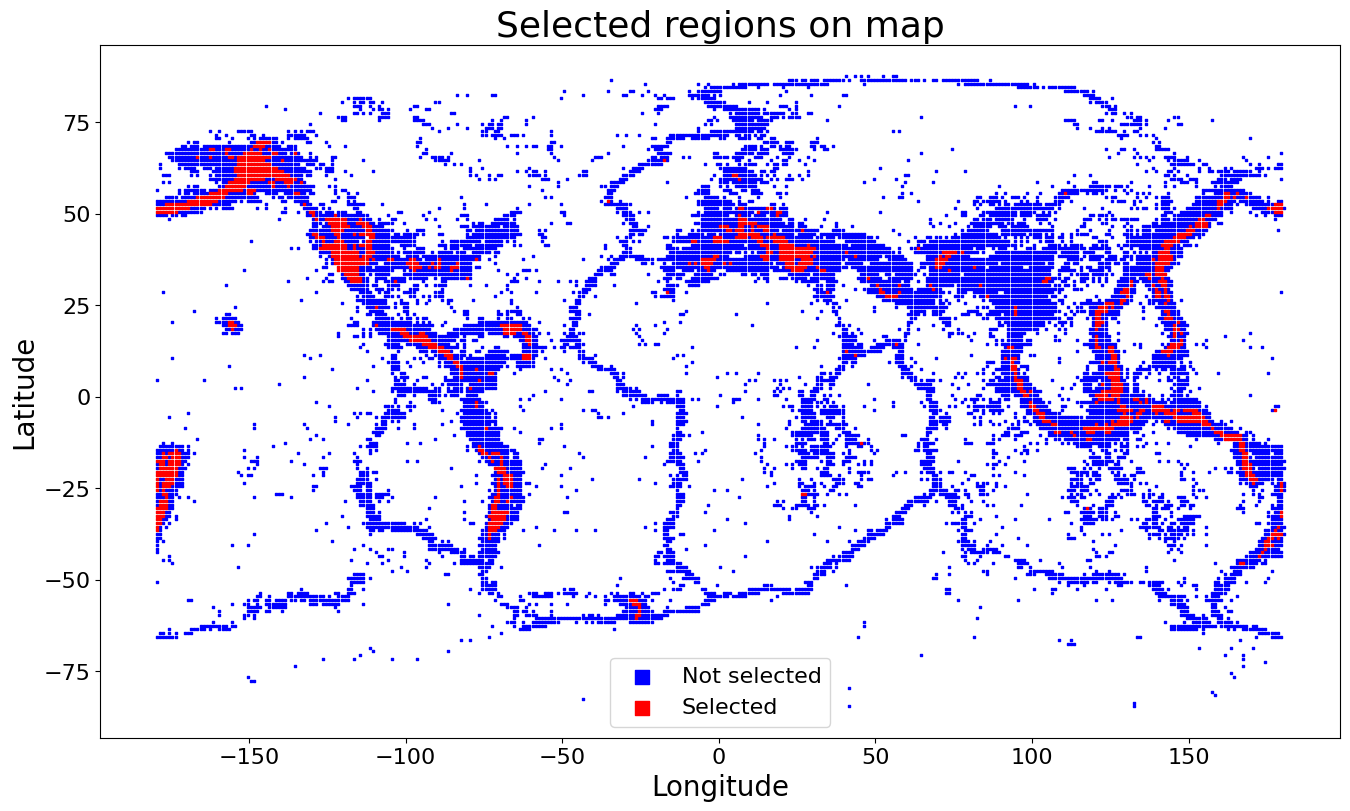

In [27]:
# plot all regions
plt.figure(figsize=(16, 9))
tmp = df[~df["pos"].isin(regions)][["lon_cent", "lat_cent"]].drop_duplicates()
plt.scatter(tmp["lon_cent"], tmp["lat_cent"], c="blue", marker="s", s=4)
tmp = df[df["pos"].isin(regions)][["lon_cent", "lat_cent"]].drop_duplicates()
plt.scatter(tmp["lon_cent"], tmp["lat_cent"], c="red", marker="s", s=4)
plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
plt.title("Selected regions on map", fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.legend(["Not selected", "Selected"], fontsize=16, markerscale=5)
plt.show()

In [5]:
df

,time,longitude,latitude,depth,mag,magType,time_disc,longitude_disc,latitude_disc,pos,lat_cent,lon_cent,plate_region,dist_region,dist,plate,label
0,1973-01-01 01:05:56.150,-117.588000,34.189833,6.000,1.70,5,1973-01-01,-118,34,34_-118,34.5,-117.5,1,16.691592,19.302507,1,0
1,1973-01-01 04:46:09.800,150.634000,-9.214000,41.000,5.30,3,1973-01-01,150,-10,-10_150,-9.5,150.5,51,21.124956,55.729840,61,0
2,1973-01-01 05:20:59.780,-122.117333,48.308667,13.680,2.20,2,1973-01-01,-123,48,48_-123,48.5,-122.5,3,296.114618,314.738391,3,0
3,1973-01-01 06:22:29.800,-173.958000,-15.012000,33.000,5.00,3,1973-01-01,-174,-16,-16_-174,-15.5,-173.5,34,84.317941,18.239739,42,0
4,1973-01-01 08:58:11.460,-155.360833,19.443667,7.302,1.85,1,1973-01-01,-156,19,19_-156,19.5,-155.5,2,3527.668174,3522.498687,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488693,2019-12-31 23:49:22.715,-148.502700,63.457500,10.800,0.90,1,2019-12-31,-149,63,63_-149,63.5,-148.5,1,455.045983,451.063738,1,0
3488694,2019-12-31 23:52:18.080,-116.805333,33.589000,5.510,0.23,1,2019-12-31,-117,33,33_-117,33.5,-116.5,1,40.420607,52.130010,1,0
3488695,2019-12-31 23:53:54.810,-66.876500,17.897100,10.000,2.22,2,2019-12-31,-67,17,17_-67,17.5,-66.5,5,257.009976,207.193582,5,1
3488696,2019-12-31 23:56:30.397,-139.909000,61.307500,8.400,1.80,1,2019-12-31,-140,61,61_-140,61.5,-139.5,1,128.965614,103.702795,1,0


In [6]:
tmp = df[["lon_cent", "lat_cent"]].drop_duplicates()

In [37]:
tmp2 = tmp[(tmp["lon_cent"] == -30.5) & (tmp["lat_cent"] == 50.5)]

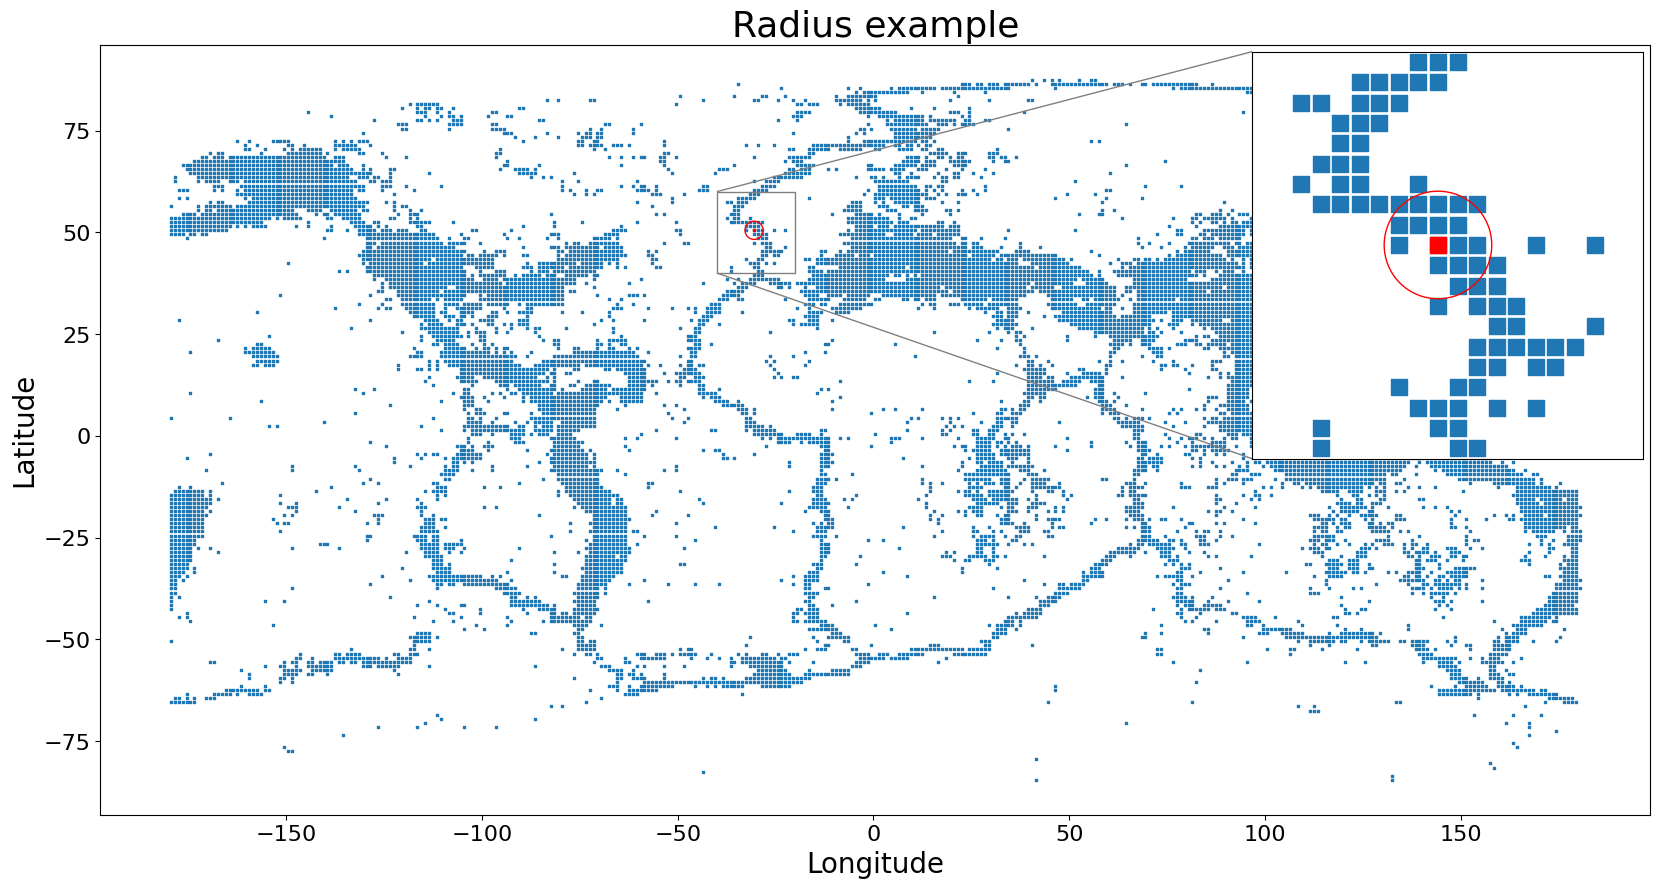

In [40]:
fig, ax = plt.subplots(figsize=[20,10])
ax.scatter(tmp["lon_cent"], tmp["lat_cent"],marker="s", s=4)
ax.scatter(tmp2["lon_cent"], tmp2["lat_cent"],marker="s", s=4, c="r")

axins = zoomed_inset_axes(ax, 5, loc=1) # zoom = 6
axins.scatter(tmp["lon_cent"], tmp["lat_cent"],marker="s", s=140)
axins.scatter(tmp2["lon_cent"], tmp2["lat_cent"],marker="s", s=140, c="r")

axins.set_xlim(-40, -20)
axins.set_ylim(40, 60)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(left = False, bottom = False) 

mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")


axins.scatter(-30.5, 50.5, s=6000, facecolors='none', edgecolors='r')
ax.scatter(-30.5, 50.5, s=171, facecolors='none', edgecolors='r')




ax.set_xlabel("Longitude", fontsize=20)
ax.set_ylabel("Latitude", fontsize=20)
ax.set_title("Radius example", fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

plt.draw()
plt.show()